In [2]:
import pandas as pd
import numpy as np
import os 
from pathlib import Path

from datetime import datetime, timedelta
import time 
from dateutil.relativedelta import relativedelta

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import pyarrow.parquet as pq
import pyarrow as pa

In [3]:
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_rows=999
pd.options.display.max_columns=999

In [ ]:
%%time
# train_file = r'/kaggle/input/amex-agg-data-rev2/agg_train_all_rev2_rev.parquet'
train_file = r'amex\agg_train_all_rev3.parquet'
df=pd.read_parquet(train_file, engine='pyarrow')

In [4]:
all_cols = df.columns.tolist()
all_cols.sort()
print(all_cols)
len(all_cols)

['B_10__first', 'B_10__last', 'B_10__last2max', 'B_10__last2min', 'B_10__max', 'B_10__mean', 'B_10__mean2std', 'B_10__min', 'B_10__range', 'B_10__std', 'B_11__first', 'B_11__last', 'B_11__last2max', 'B_11__last2min', 'B_11__last__log', 'B_11__max', 'B_11__mean', 'B_11__mean2std', 'B_11__mean__log', 'B_11__min', 'B_11__range', 'B_11__std', 'B_12__first', 'B_12__last', 'B_12__last2max', 'B_12__last2min', 'B_12__last__log', 'B_12__max', 'B_12__mean', 'B_12__mean2std', 'B_12__mean__log', 'B_12__min', 'B_12__range', 'B_12__std', 'B_13__first', 'B_13__last', 'B_13__last2max', 'B_13__last2min', 'B_13__last__log', 'B_13__max', 'B_13__mean', 'B_13__mean2std', 'B_13__mean__log', 'B_13__min', 'B_13__range', 'B_13__std', 'B_14__first', 'B_14__last', 'B_14__last2max', 'B_14__last2min', 'B_14__max', 'B_14__mean', 'B_14__mean2std', 'B_14__min', 'B_14__range', 'B_14__std', 'B_15__first', 'B_15__last', 'B_15__last2max', 'B_15__last2min', 'B_15__max', 'B_15__mean', 'B_15__mean2std', 'B_15__min', 'B_15__

2122

In [5]:
id_feats = ['customer_ID']
date_col =  'S_2'
target_col = 'target'

# x_cols = list(set(all_cols)-set(['customer_ID', 'S_2', 'target']))
# len(x_cols)

# x_cols = ['P_2__last', 'P_2__min', 'P_2__mean', 'D_48__last', 'P_2__max', 'R_1__mean__log', 'D_48__mean', 'R_1__std', 'D_44__mean__log', 'B_2__last__log', 'B_2__last', 'R_1__max', 'P_2__first', 'D_44__last__log', 'R_1__range', 'B_18__last', 'B_9__last', 'B_3__last__log', 'D_61__last', 'B_2__mean', 'D_48__max', 'D_55__last', 'B_9__mean', 'B_3__mean__log', 'R_1__mean', 'B_33__last', 'D_44__last', 'D_44__max', 'B_18__mean', 'D_48__min', 'B_23__last__log', 'B_33__mean', 'B_3__last', 'B_33__last__log', 'B_7__last', 'B_11__last__log', 'D_75__last', 'D_58__last', 'B_2__last2max', 'B_20__last__log', 'B_23__last', 'R_10__mean__log', 'B_23__mean__log', 'B_2__mean__log', 'D_55__max', 'D_61__mean', 'B_3__max', 'B_18__last__log', 'B_22__mean__log', 'D_75__mean__log', 'B_2__min', 'B_9__last__log', 'D_75__last__log', 'D_44__mean', 'B_11__mean__log', 'R_1__last', 'B_20__mean__log', 'D_75__max', 'R_10__std', 'B_18__min', 'B_16__last', 'D_61__min', 'D_78__mean__log', 'D_48__first', 'B_9__mean__log', 'D_58__max', 'B_4__last', 'D_44__std', 'B_3__range', 'B_3__std', 'D_74__last', 'B_20__last', 'B_19__last__log', 'R_10__max', 'D_75__mean', 'R_10__range', 'D_44__range', 'B_19__mean__log', 'D_58__mean', 'B_22__max', 'B_19__last', 'D_74__mean__log', 'B_7__max', 'D_74__last__log', 'B_1__last', 'B_7__mean', 'B_23__max', 'B_37__last', 'R_1__last__log', 'B_4__last__log', 'R_2__mean__log', 'D_58__last__log', 'R_2__max', 'B_19__max', 'B_18__mean__log', 'B_3__mean', 'B_23__mean', 'R_2__std', 'B_33__mean__log', 'D_55__mean', 'D_74__max', 'B_40__last__log', 'D_58__mean__log', 'B_9__max', 'R_2__range', 'B_18__max', 'B_40__mean__log', 'B_11__last', 'B_4__mean__log', 'B_9__min', 'B_20__max', 'D_78__std', 'B_30=0.0', 'D_74__mean', 'B_22__mean', 'B_30__nunique', 'B_16__max', 'R_2__last', 'D_78__range', 'B_33__last2max', 'D_78__max', 'D_55__std', 'B_22__std', 'R_4__std', 'D_55__range', 'R_5__mean__log', 'B_18__last2max', 'D_55__last__log', 'R_4__mean__log', 'R_4__max', 'D_77__mean__log', 'B_22__range', 'B_1__mean', 'B_22__last', 'B_16__last__log', 'B_4__mean', 'R_4__range', 'B_37__mean', 'R_10__mean', 'R_8__mean__log', 'B_33__min', 'B_4__max', 'D_77__last__log', 'B_30=1.0', 'D_84__mean__log', 'D_75__min', 'B_4__last2max', 'B_19__mean', 'B_22__last__log', 'B_28__last2max', 'D_39__max', 'R_6__mean__log', 'D_41__range', 'B_11__mean', 'D_39__std', 'D_41__std', 'R_2__mean', 'D_58__min', 'B_14__last2max', 'D_39__range', 'B_19__range', 'S_7__max', 'D_55__mean__log', 'B_16__mean', 'B_7__min', 'B_11__last2max', 'B_2__max', 'S_7__mean', 'S_25__std', 'D_41__last', 'B_20__mean', 'D_41__max', 'B_1__max', 'B_37__max', 'S_3__max', 'B_16__last2max', 'S_25__range', 'D_44__first', 'P_3__min', 'S_3__mean', 'D_75__first', 'D_75__last2max', 'R_7__mean__log', 'B_9__first', 'P_3__mean', 'B_19__std', 'B_23__min', 'D_41__last__log', 'S_25__min', 'D_112__last__log', 'D_70__max', 'D_41__mean__log', 'R_4__mean', 'B_16__mean__log', 'D_74__min', 'B_18__first', 'B_33__max', 'B_11__max', 'D_70__mean__log', 'P_2__range', 'B_9__last2max', 'D_44__min', 'D_62__mean', 'D_78__last__log', 'P_2__std', 'D_70__std', 'B_6__last2max', 'B_4__min', 'S_7__last', 'S_25__mean', 'R_4__last', 'R_2__last__log', 'D_65__mean__log', 'B_23__range', 'B_2__first', 'B_38=2.0', 'D_112__last', 'D_62__max', 'R_3__mean', 'R_3__max', 'D_74__first', 'B_10__min', 'D_58__first', 'D_75__std', 'B_17__min', 'D_70__mean', 'B_25__last2max', 'D_78__last', 'D_70__range', 'B_20__last2max', 'D_75__range', 'B_23__last2max', 'P_3__last', 'S_3__last', 'D_112__last2max', 'B_8__min', 'D_55__min', 'D_39__last', 'D_62__last', 'D_78__mean', 'D_74__std', 'B_7__range', 'D_77__mean', 'S_15__max', 'R_8__std', 'B_37__last2max', 'B_23__std', 'D_74__range', 'B_38=4.0', 'B_1__min', 'B_8__mean', 'D_45__mean__log', 'S_7__range', 'D_58__last2max', 'B_7__first', 'R_8__max', 'R_8__range', 'D_77__max', 'B_8__first', 'R_15__std', 'D_70__last', 'B_37__min', 'R_15__max', 'D_77__last', 'R_15__range', 'S_7__std', 'B_7__std', 'D_74__last2max', 'B_23__first', 'R_15__mean__log', 'B_38__nunique', 'S_3__range', 'B_3__min', 'R_3__mean__log', 'D_43__mean', 'D_53__last__log', 'R_5__std', 'R_5__max', 'D_58__range', 'D_58__std', 'B_1__last2max', 'R_5__range', 'R_3__range', 'D_77__first', 'D_84__max', 'D_62__first', 'R_3__std', 'B_11__min', 'S_3__std', 'D_84__range', 'B_7__last2max', 'B_8__mean__log', 'B_3__last2max', 'B_28__mean__log', 'B_16__min', 'B_8__last', 'D_77__min', 'D_51__mean__log', 'D_84__std', 'D_70__last__log', 'B_33__first', 'D_45__last__log', 'S_15__range', 'B_38=5.0', 'B_20__range', 'D_43__max', 'D_53__mean__log', 'S_15__std', 'S_7__min', 'D_44__last2max', 'D_55__last2max', 'B_8__last__log', 'B_8__max', 'D_43__mean__log', 'D_62__min', 'D_39__mean', 'D_55__first', 'P_4__first', 'P_4__max', 'D_72__mean__log', 'B_3__first', 'D_84__last__log', 'R_15__mean', 'R_10__last', 'S_7__first', 'B_4__first', 'S_3__min', 'D_112__min', 'S_3__first', 'D_47__min', 'P_3__std', 'D_47__last', 'D_41__mean', 'D_39__mean__log', 'D_47__mean', 'P_4__mean__log', 'B_4__std', 'S_25__last', 'B_26__mean__log', 'D_81__mean__log', 'B_19__min', 'R_6__last__log', 'D_43__last', 'R_8__mean', 'B_10__last2max', 'D_47__first', 'B_9__std', 'B_20__std', 'B_1__first', 'D_45__first', 'D_45__max', 'R_5__last__log', 'B_40__min', 'D_43__last__log', 'B_37__first', 'D_47__max', 'R_16__mean__log', 'B_20__min', 'R_24__max', 'R_16__std', 'R_3__first', 'B_40__last2max', 'D_51__last__log', 'D_53__max', 'R_16__mean', 'D_53__last', 'D_54__last', 'R_24__range', 'R_24__std', 'D_54__last2max', 'D_65__last__log', 'B_4__range', 'D_43__std', 'B_19__first', 'D_45__mean', 'R_4__last__log', 'D_51__mean', 'D_39__last__log', 'R_3__last', 'B_9__range', 'R_20__mean__log', 'R_24__mean__log', 'R_10__last__log', 'B_28__last', 'R_27__last', 'R_27__min', 'D_51__last', 'D_84__last', 'R_5__mean', 'D_43__range', 'D_43__min', 'R_27__mean', 'R_14__mean__log', 'D_53__range', 'B_11__first', 'D_54__min', 'D_51__max', 'D_53__std', 'R_16__max', 'R_7__last__log', 'D_45__min', 'R_16__range', 'P_4__mean', 'B_22__first', 'D_45__last', 'D_79__mean__log', 'D_131__max', 'R_26__mean2std', 'B_16__std', 'D_54__range', 'D_131__mean__log', 'D_81__max', 'B_26__last__log', 'B_20__first', 'D_81__last', 'R_1__first', 'D_84__mean', 'B_19__last2max', 'D_72__max', 'D_131__last', 'S_15__mean', 'R_27__max', 'R_27__first', 'P_3__range', 'R_5__last', 'D_42__max', 'B_1__range', 'D_53__mean', 'D_112__mean', 'D_42__first', 'B_30=2.0', 'D_42__mean', 'B_37__range', 'B_11__range', 'B_17__mean2std', 'B_16__first', 'D_120__nunique', 'B_16__range', 'D_72__range', 'D_81__range', 'D_70__first', 'D_43__first', 'B_1__std', 'B_37__std', 'D_131__mean', 'D_52__min', 'D_89__mean__log', 'D_79__max', 'D_42__min', 'B_11__std', 'D_42__last', 'D_72__std', 'D_81__last__log', 'B_17__mean', 'D_89__std', 'D_81__std', 'D_54__std', 'D_89__max', 'R_13__max', 'D_89__range', 'R_8__last__log', 'R_13__std', 'D_79__last', 'D_120=0.0', 'D_112__range', 'D_72__last', 'R_13__range', 'D_52__mean', 'D_51__first', 'D_79__mean', 'D_72__last__log', 'R_3__last__log', 'S_8__min', 'D_106__mean2std', 'D_112__std', 'B_21__mean__log', 'R_8__last', 'B_28__min', 'D_130__last', 'D_42__mean2std', 'R_3__min', 'D_49__mean2std', 'D_52__last', 'R_24__mean', 'D_46__mean', 'S_25__last2max', 'D_130__max', 'D_62__last2max', 'D_120=1.0', 'D_127__max', 'D_127__mean__log', 'D_52__first', 'D_79__last__log', 'R_11__mean', 'D_131__last__log', 'D_51__min', 'B_25__last', 'D_130__mean__log', 'B_28__mean', 'D_53__mean2std', 'R_21__max', 'D_64=O', 'R_21__mean__log', 'S_11__min', 'S_16__mean__log', 'B_8__last2max', 'R_21__std', 'D_114=1.0', 'R_11__std', 'D_59__last', 'D_130__last__log', 'R_24__last', 'R_13__mean__log', 'D_130__mean', 'R_21__range', 'P_4__range', 'R_6__max', 'S_15__last', 'D_131__first', 'D_59__mean', 'D_133__mean__log', 'R_6__range', 'R_9__mean2std', 'D_81__mean', 'B_2__std', 'R_20__max', 'D_127__mean', 'D_52__max', 'D_70__min', 'R_21__mean', 'P_4__std', 'R_20__range', 'R_20__std', 'B_12__mean__log', 'B_25__min', 'D_135__mean2std', 'D_71__last__log', 'D_59__max', 'D_89__mean', 'D_137__mean2std', 'D_138__mean2std', 'D_72__mean', 'D_79__first', 'R_6__std', 'D_53__min', 'D_136__mean2std', 'D_132__mean2std', 'R_15__last', 'S_5__mean__log', 'D_112__mean__log', 'D_41__mean2std', 'D_116__nunique', 'D_134__mean2std', 'S_13__last2max', 'D_128__min', 'D_128__first', 'D_131__min', 'D_64__last=O', 'S_20__max', 'D_128__mean', 'D_51__std', 'R_11__mean__log', 'S_27__last__log', 'D_115__mean__log', 'S_27__last2max', 'P_3__first', 'B_2__range', 'S_8__last', 'D_128__mean__log', 'D_68=6.0', 'R_13__mean', 'R_11__max', 'D_79__std', 'B_12__last__log', 'S_20__std', 'D_127__last', 'D_128__max', 'D_79__min', 'B_25__mean', 'S_20__mean__log', 'D_128__last', 'D_59__min', 'R_11__range', 'D_53__first', 'D_127__range', 'S_20__range', 'D_118__max', 'D_115__mean', 'D_51__range', 'D_130__min', 'D_79__range', 'D_115__max', 'D_62__std', 'D_71__mean__log', 'D_62__range', 'D_115__last', 'D_119__max', 'D_68__nunique', 'B_20__mean2std', 'D_78__first', 'R_17__max', 'D_130__first', 'D_128__last__log', 'B_38=6.0', 'D_127__std', 'D_115__last__log', 'D_92__mean__log', 'B_17__last', 'R_17__std', 'B_24__mean__log', 'R_17__range', 'S_8__mean', 'R_12__last', 'D_118__mean', 'B_32__max', 'B_22__min', 'S_6__range', 'R_20__mean', 'R_12__min', 'D_119__mean', 'P_4__min', 'R_6__mean', 'B_32__range', 'D_118__mean__log', 'D_115__first', 'S_20__mean', 'D_48__std', 'D_118__last', 'S_8__last2max', 'P_4__last', 'B_28__max', 'D_115__min', 'D_119__last', 'D_119__mean__log', 'S_13__min', 'D_56__mean2std', 'D_54__mean', 'S_5__last__log', 'D_92__max', 'S_15__first', 'D_39__mean2std', 'B_32__std', 'S_6__last2max', 'S_22__max', 'D_121__max', 'S_6__std', 'D_121__last', 'D_118__first', 'R_6__last', 'R_12__range', 'D_133__last__log', 'D_121__mean', 'D_89__last', 'B_32__mean__log', 'D_127__first', 'D_119__first', 'D_122__mean', 'R_12__std', 'R_13__last', 'D_92__mean', 'D_127__last__log', 'D_59__first', 'D_91__mean__log', 'D_122__last', 'S_24__max', 'D_113__last', 'D_121__first', 'D_113__mean__log', 'D_42__range', 'B_5__mean__log', 'D_121__min', 'D_113__mean', 'B_38=1.0', 'B_24__std', 'D_48__range', 'D_113__min', 'R_21__last', 'R_17__mean', 'B_24__range', 'D_126=999.0', 'B_24__max', 'S_13__last', 'D_118__min', 'R_10__first', 'D_122__max', 'S_25__first', 'D_133__max', 'R_2__first', 'D_113__last__log', 'D_91__max', 'D_122__min', 'D_119__min', 'P_4__last__log', 'B_17__last2max', 'D_92__last', 'D_131__range', 'D_122__mean__log', 'D_118__last__log', 'S_23__mean2std', 'R_12__mean', 'R_17__mean__log', 'S_27__std', 'D_113__max', 'D_113__first', 'D_114=0.0', 'D_119__last__log', 'B_28__first', 'D_131__std', 'D_46__last', 'D_77__range', 'D_64__last=U', 'B_17__mean__log', 'R_14__last__log', 'R_25__std', 'R_20__last', 'D_133__last', 'B_31__nunique', 'S_11__std', 'R_25__max', 'R_22__max', 'D_114=999.0', 'D_120=999.0', 'D_117=999.0', 'D_116=999.0', 'D_122__first', 'R_25__range', 'R_22__range', 'D_114__nunique', 'B_17__std', 'D_133__mean', 'B_17__range', 'B_17__last__log', 'S_22__mean', 'S_27__range', 'D_64__nunique', 'B_3__mean2std', 'R_20__last__log', 'R_1__min', 'S_11__range', 'S_24__mean', 'R_22__std', 'S_13__std', 'D_65__mean2std', 'B_38=7.0', 'S_6__min', 'D_129__first', 'D_42__std', 'D_133__range', 'B_26__mean2std', 'D_129__mean', 'D_122__last__log', 'B_24__mean', 'D_41__first', 'D_92__range', 'D_129__mean__log', 'D_46__first', 'D_92__first', 'B_24__last__log', 'D_112__max', 'D_92__std', 'D_68=999.0', 'D_91__std', 'D_91__range', 'B_24__last', 'D_129__max', 'D_91__mean', 'S_27__mean2std', 'D_53__last2max', 'R_25__mean__log', 'D_64=NA', 'D_133__std', 'R_24__last__log', 'B_31=0', 'S_8__first', 'D_129__min', 'D_77__std', 'D_106__last2max', 'S_20__last', 'S_26__mean__log', 'R_21__first', 'R_1__mean2std', 'D_72__first', 'D_92__last__log', 'D_52__last2max', 'D_129__last', 'B_5__last__log', 'S_13__last__log', 'R_25__mean', 'D_116=0.0', 'R_22__mean__log', 'D_41__min', 'R_7__std', 'D_140__max', 'B_32__last', 'R_7__max', 'R_15__last__log', 'D_140__mean__log', 'D_130__last2max', 'R_7__range', 'D_91__last', 'D_129__last__log', 'B_21__max', 'B_21__std', 'D_41__last2max', 'D_140__mean', 'B_19__mean2std', 'B_32__mean', 'B_21__range', 'R_6__mean2std', 'R_19__last', 'D_128__last2max', 'R_22__mean', 'D_56__mean', 'D_143__last', 'D_139__last', 'D_64=U', 'D_103__mean', 'D_145__mean__log', 'R_5__mean2std', 'S_6__last', 'B_33__std', 'B_41__max', 'D_140__last', 'D_104__mean', 'B_41__mean__log', 'B_41__range', 'S_11__last2max', 'R_9__std', 'B_22__last2max', 'D_103__last', 'D_56__last', 'D_56__min', 'D_56__first', 'D_141__last', 'R_4__first', 'R_7__mean', 'D_104__last', 'B_14__min', 'D_56__max', 'D_143__min', 'D_139__min', 'B_41__std', 'D_143__mean', 'D_139__mean', 'B_4__mean2std', 'R_9__range', 'D_107__mean__log', 'R_17__last', 'D_103__min', 'D_107__mean', 'D_107__last', 'D_104__min', 'B_41__last', 'D_107__last__log', 'D_141__min', 'D_141__mean', 'D_139__mean__log', 'D_103__last__log', 'D_143__mean__log', 'D_143__max', 'R_16__last', 'D_84__first', 'D_139__max', 'D_136__min', 'D_104__last__log', 'R_2__mean2std', 'D_141__mean__log', 'D_91__first', 'D_107__min', 'B_25__first', 'S_13__mean', 'D_103__mean__log', 'D_104__mean__log', 'P_3__max', 'B_21__mean', 'R_19__max', 'S_6__last__log', 'D_136__std', 'D_65__range', 'D_138__max', 'D_139__last__log', 'D_138__mean', 'D_61__max', 'D_141__max', 'D_65__max', 'D_136__last2max', 'D_143__first', 'D_139__first', 'D_141__last__log', 'D_143__last__log', 'B_31=1', 'B_23__mean2std', 'D_107__max', 'S_23__mean', 'D_145__last', 'D_138__last2max', 'D_145__last__log', 'R_7__mean2std', 'B_25__max', 'S_20__first', 'B_28__mean2std', 'D_141__first', 'D_103__max', 'D_60__last__log', 'D_136__range', 'D_84__mean2std', 'R_16__first', 'D_91__last__log', 'D_76__mean2std', 'D_104__max', 'D_103__first', 'P_3__last2max', 'R_19__mean__log', 'D_50__mean2std', 'B_21__last__log', 'D_60__last2max', 'D_104__first', 'D_51__last2max', 'S_13__range', 'D_130__range', 'D_145__mean', 'D_130__std', 'D_138__last', 'D_145__max', 'D_145__min', 'B_11__mean2std', 'D_65__last', 'D_69__mean__log', 'S_26__last__log', 'D_60__max', 'D_112__first', 'D_117=4.0', 'D_107__first', 'D_133__first', 'S_23__last', 'D_138__mean__log', 'D_83__mean__log', 'S_25__mean2std', 'D_60__range', 'D_127__min', 'days', 'B_6__min', 'D_81__first', 'R_19__mean', 'B_14__last', 'S_16__last__log', 'S_11__mean', 'D_145__first', 'D_46__min', 'B_7__mean2std', 'D_138__first', 'B_41__mean', 'D_39__last2max', 'D_123__mean__log', 'D_126=1.0', 'D_72__min', 'S_2=count', 'B_33__range', 'D_140__first', 'D_61__first', 'D_44__mean2std', 'B_31__last', 'D_92__min', 'R_7__last', 'R_10__last2max', 'R_16__last__log', 'D_59__std', 'D_60__std', 'R_4__mean2std', 'B_38=3.0', 'D_140__std', 'S_16__std', 'D_140__range', 'B_37__mean2std', 'B_1__mean2std', 'D_138__min', 'D_117__nunique', 'D_78__min', 'D_125__mean', 'S_3__mean2std', 'D_131__last2max', 'D_65__std', 'D_133__min', 'D_136__last__log', 'S_24__last', 'D_54__mean2std', 'B_40__mean2std', 'R_26__last', 'R_26__max', 'R_5__first', 'D_113__last2max', 'D_112__mean2std', 'D_81__min', 'D_125__mean__log', 'D_123__max', 'S_11__first', 'R_8__mean2std', 'D_94__max', 'D_117=5.0', 'S_16__max', 'R_24__first', 'D_45__range', 'D_78__mean2std', 'R_26__mean', 'R_11__first', 'S_16__mean', 'D_136__mean__log', 'R_21__last__log', 'S_16__range', 'S_8__std', 'D_43__mean2std', 'D_71__mean', 'D_123__std', 'S_7__mean2std', 'D_123__range', 'D_71__last2max', 'D_79__last2max', 'R_26__first', 'D_94__mean__log', 'S_22__last', 'B_41__last__log', 'S_27__mean__log', 'D_68=3.0', 'R_19__range', 'R_19__std', 'R_8__first', 'R_25__last', 'D_89__last__log', 'D_59__range', 'R_27__range', 'D_45__std', 'D_83__max', 'D_91__min', 'D_103__last2max', 'D_125__max', 'S_8__max', 'D_104__last2max', 'R_27__std', 'B_17__max', 'R_16__last2max', 'D_142__mean2std', 'D_77__last2max', 'D_63=CR', 'B_38__last', 'D_94__range', 'R_26__min', 'B_32__last__log', 'B_21__last', 'D_70__last2max', 'D_140__min', 'D_102__last__log', 'D_94__std', 'D_71__last', 'R_13__last__log', 'S_6__mean', 'S_11__last', 'D_83__mean', 'D_83__last', 'S_8__last__log', 'D_46__max', 'D_68=2.0', 'B_14__mean', 'D_135__max', 'D_105__mean2std', 'B_16__mean2std', 'D_125__std', 'D_81__last2max', 'B_21__first', 'D_70__mean2std', 'D_140__last__log', 'S_27__max', 'B_8__std', 'R_9__max', 'B_5__mean', 'D_63__last=CR', 'D_71__max', 'D_135__range', 'B_5__max', 'D_96__max', 'D_96__mean__log', 'B_5__last', 'R_12__first', 'D_72__mean2std', 'D_123__mean', 'D_107__last2max', 'B_6__last', 'D_102__mean__log', 'D_138__std', 'S_8__range', 'B_8__range', 'D_94__mean', 'D_125__range', 'S_13__first', 'D_86__max', 'R_10__mean2std', 'R_2__min', 'D_77__mean2std', 'B_5__min', 'D_138__range', 'R_19__last__log', 'D_135__std', 'R_2__last2max', 'P_2__last2max', 'B_28__std', 'D_117=6.0', 'D_117=2.0', 'D_88__mean2std', 'D_81__mean2std', 'D_74__mean2std', 'P_2__mean2std', 'D_60__mean', 'D_65__mean', 'D_86__mean__log', 'D_71__min', 'D_139__last2max', 'S_9__mean', 'S_5__last2max', 'D_83__std', 'D_75__mean2std', 'D_71__first', 'S_12__min', 'D_129__last2max', 'D_60__last', 'D_134__first', 'D_141__last2max', 'B_5__range', 'R_26__range', 'R_11__last', 'R_26__std', 'D_83__range', 'D_96__mean', 'D_96__range', 'D_143__last2max', 'D_56__range', 'R_19__min', 'D_83__first', 'D_136__first', 'D_58__mean2std', 'D_106__last__log', 'D_134__last', 'D_117=1.0', 'D_134__mean', 'B_5__std', 'D_134__min', 'S_20__last__log', 'D_68=1.0', 'D_96__std', 'D_134__max', 'D_48__last2max', 'D_54__first', 'R_15__first', 'D_64__last=R', 'D_145__last2max', 'D_125__last', 'D_86__mean', 'D_69__last__log', 'R_22__last', 'D_132__last2max', 'R_20__first', 'R_12__max', 'R_9__last2max', 'D_94__last', 'D_134__range', 'R_27__last2max', 'D_83__last__log', 'D_123__first', 'D_125__first', 'D_134__std', 'R_14__range', 'R_14__max', 'R_19__first', 'B_18__std', 'S_24__mean2std', 'D_56__std', 'S_9__first', 'B_32__first', 'B_24__first', 'D_68=4.0', 'D_86__first', 'R_14__std', 'D_84__min', 'D_71__range', 'S_16__last', 'D_115__last2max', 'D_94__first', 'D_138__last__log', 'P_3__mean2std', 'D_80__std', 'D_83__min', 'D_96__last', 'B_5__first', 'S_12__last2max', 'R_9__last', 'D_86__last', 'S_5__mean2std', 'D_39__first', 'D_55__mean2std', 'R_6__first', 'S_9__mean__log', 'D_135__mean__log', 'D_72__last2max', 'D_71__std', 'R_11__last2max', 'S_9__last2max', 'B_15__last2max', 'D_39__min', 'S_9__min', 'D_125__last__log', 'R_21__min', 'D_135__first', 'S_26__std', 'D_76__min', 'B_9__mean2std', 'D_76__mean', 'D_76__last', 'D_80__last', 'S_23__std', 'S_9__last', 'S_26__range', 'B_22__mean2std', 'D_80__range', 'D_76__mean__log', 'D_76__first', 'B_28__range', 'R_13__mean2std', 'D_86__range', 'D_76__max', 'S_17__std', 'D_46__last2max', 'D_80__max', 'D_89__first', 'B_18__range', 'R_15__last2max', 'D_135__mean', 'S_12__std', 'S_9__max', 'D_80__mean', 'S_6__max', 'D_123__last', 'D_66=1.0', 'D_86__std', 'S_17__range', 'D_124__max', 'D_126=0.0', 'D_96__first', 'S_17__max', 'D_50__mean', 'B_14__mean2std', 'D_54__max', 'S_16__first', 'D_124__first', 'D_64=R', 'S_25__max', 'S_15__last2max', 'D_76__last__log', 'D_45__last2max', 'R_11__last__log', 'B_6__mean', 'D_60__mean__log', 'D_50__last', 'D_133__last2max', 'B_25__mean2std', 'D_113__range', 'S_12__range', 'D_113__std', 'S_23__range', 'D_82__mean2std', 'B_41__first', 'D_106__mean__log', 'R_15__mean2std', 'S_26__max', 'D_110__mean2std', 'D_111__mean2std', 'B_6__mean2std', 'S_5__mean', 'D_102__last2max', 'D_126__last', 'B_24__min', 'D_137__max', 'D_137__last__log', 'D_106__min', 'S_20__min', 'R_17__last__log', 'S_27__last', 'D_66__last', 'D_137__range', 'D_62__mean2std', 'S_23__max', 'D_119__range', 'D_124__last', 'D_124__mean', 'D_118__range', 'R_14__mean', 'R_13__first', 'D_86__min', 'S_9__std', 'B_14__first', 'D_137__std', 'S_22__first', 'S_24__first', 'D_125__min', 'D_124__min', 'D_60__first', 'R_4__min']

x_cols = ['P_2__last', 'P_2__min', 'P_2__mean', 'D_48__last', 'P_2__max', 'R_1__mean__log', 'D_48__mean', 'R_1__std', 'D_44__mean__log', 'B_2__last__log', 'B_2__last', 'R_1__max', 'P_2__first', 'D_44__last__log', 'R_1__range', 'B_18__last', 'B_9__last', 'B_3__last__log', 'D_61__last', 'B_2__mean', 'D_48__max', 'D_55__last', 'B_9__mean', 'B_3__mean__log', 'R_1__mean', 'B_33__last', 'D_44__last', 'D_44__max', 'B_18__mean', 'D_48__min', 'B_23__last__log', 'B_33__mean', 'B_3__last', 'B_33__last__log', 'B_7__last', 'B_11__last__log', 'D_75__last', 'D_58__last', 'B_2__last2max', 'B_20__last__log', 'B_23__last', 'R_10__mean__log', 'B_23__mean__log', 'B_2__mean__log', 'D_55__max', 'D_61__mean', 'B_3__max', 'B_18__last__log', 'B_22__mean__log', 'D_75__mean__log', 'B_2__min', 'B_9__last__log', 'D_75__last__log', 'D_44__mean', 'B_11__mean__log', 'R_1__last', 'B_20__mean__log', 'D_75__max', 'R_10__std', 'B_18__min', 'B_16__last', 'D_61__min', 'D_78__mean__log', 'D_48__first', 'B_9__mean__log', 'D_58__max', 'B_4__last', 'D_44__std', 'B_3__range', 'B_3__std', 'D_74__last', 'B_20__last', 'B_19__last__log', 'R_10__max', 'D_75__mean', 'R_10__range', 'D_44__range', 'B_19__mean__log', 'D_58__mean', 'B_22__max', 'B_19__last', 'D_74__mean__log', 'B_7__max', 'D_74__last__log', 'B_1__last', 'B_7__mean', 'B_23__max', 'B_37__last', 'R_1__last__log', 'B_4__last__log', 'R_2__mean__log', 'D_58__last__log', 'R_2__max', 'B_19__max', 'B_18__mean__log', 'B_3__mean', 'B_23__mean', 'R_2__std', 'B_33__mean__log', 'D_55__mean', 'D_74__max', 'B_40__last__log', 'D_58__mean__log', 'B_9__max', 'R_2__range', 'B_18__max', 'B_40__mean__log', 'B_11__last', 'B_4__mean__log', 'B_9__min', 'B_20__max', 'D_78__std', 'B_30=0.0', 'D_74__mean', 'B_22__mean', 'B_30__nunique', 'B_16__max', 'R_2__last', 'D_78__range', 'B_33__last2max', 'D_78__max', 'D_55__std', 'B_22__std', 'R_4__std', 'D_55__range', 'R_5__mean__log', 'B_18__last2max', 'D_55__last__log', 'R_4__mean__log', 'R_4__max', 'D_77__mean__log', 'B_22__range', 'B_1__mean', 'B_22__last', 'B_16__last__log', 'B_4__mean', 'R_4__range', 'B_37__mean', 'R_10__mean', 'R_8__mean__log', 'B_33__min', 'B_4__max', 'D_77__last__log', 'B_30=1.0', 'D_84__mean__log', 'D_75__min', 'B_4__last2max', 'B_19__mean', 'B_22__last__log', 'B_28__last2max', 'D_39__max', 'R_6__mean__log', 'D_41__range', 'B_11__mean', 'D_39__std', 'D_41__std', 'R_2__mean', 'D_58__min', 'B_14__last2max', 'D_39__range', 'B_19__range', 'S_7__max', 'D_55__mean__log', 'B_16__mean', 'B_7__min', 'B_11__last2max', 'B_2__max', 'S_7__mean', 'S_25__std', 'D_41__last', 'B_20__mean', 'D_41__max', 'B_1__max', 'B_37__max', 'S_3__max', 'B_16__last2max', 'S_25__range', 'D_44__first', 'P_3__min', 'S_3__mean', 'D_75__first', 'D_75__last2max', 'R_7__mean__log', 'B_9__first', 'P_3__mean', 'B_19__std', 'B_23__min', 'D_41__last__log', 'S_25__min', 'D_112__last__log', 'D_70__max', 'D_41__mean__log', 'R_4__mean', 'B_16__mean__log', 'D_74__min', 'B_18__first', 'B_33__max', 'B_11__max', 'D_70__mean__log', 'P_2__range', 'B_9__last2max', 'D_44__min', 'D_62__mean', 'D_78__last__log', 'P_2__std', 'D_70__std', 'B_6__last2max', 'B_4__min', 'S_7__last', 'S_25__mean', 'R_4__last', 'R_2__last__log', 'D_65__mean__log', 'B_23__range', 'B_2__first', 'B_38=2.0', 'D_112__last', 'D_62__max', 'R_3__mean', 'R_3__max', 'D_74__first', 'B_10__min', 'D_58__first', 'D_75__std', 'B_17__min', 'D_70__mean', 'B_25__last2max', 'D_78__last', 'D_70__range', 'B_20__last2max', 'D_75__range', 'B_23__last2max', 'P_3__last', 'S_3__last', 'D_112__last2max', 'B_8__min', 'D_55__min', 'D_39__last', 'D_62__last', 'D_78__mean', 'D_74__std', 'B_7__range', 'D_77__mean', 'S_15__max', 'R_8__std', 'B_37__last2max', 'B_23__std', 'D_74__range', 'B_38=4.0', 'B_1__min', 'B_8__mean', 'D_45__mean__log', 'S_7__range', 'D_58__last2max', 'B_7__first', 'R_8__max', 'R_8__range', 'D_77__max', 'B_8__first', 'R_15__std', 'D_70__last', 'B_37__min', 'R_15__max', 'D_77__last', 'R_15__range', 'S_7__std', 'B_7__std', 'D_74__last2max', 'B_23__first', 'R_15__mean__log', 'B_38__nunique', 'S_3__range', 'B_3__min', 'R_3__mean__log', 'D_43__mean', 'D_53__last__log', 'R_5__std', 'R_5__max', 'D_58__range', 'D_58__std', 'B_1__last2max', 'R_5__range', 'R_3__range', 'D_77__first', 'D_84__max', 'D_62__first', 'R_3__std', 'B_11__min', 'S_3__std', 'D_84__range', 'B_7__last2max', 'B_8__mean__log', 'B_3__last2max', 'B_28__mean__log', 'B_16__min', 'B_8__last', 'D_77__min', 'D_51__mean__log', 'D_84__std', 'D_70__last__log', 'B_33__first', 'D_45__last__log', 'S_15__range', 'B_38=5.0', 'B_20__range', 'D_43__max', 'D_53__mean__log', 'S_15__std', 'S_7__min', 'D_44__last2max', 'D_55__last2max', 'B_8__last__log', 'B_8__max', 'D_43__mean__log', 'D_62__min', 'D_39__mean', 'D_55__first', 'P_4__first', 'P_4__max', 'D_72__mean__log', 'B_3__first', 'D_84__last__log', 'R_15__mean', 'R_10__last', 'S_7__first', 'B_4__first', 'S_3__min', 'D_112__min', 'S_3__first', 'D_47__min', 'P_3__std', 'D_47__last', 'D_41__mean', 'D_39__mean__log', 'D_47__mean', 'P_4__mean__log', 'B_4__std', 'S_25__last', 'B_26__mean__log', 'D_81__mean__log', 'B_19__min', 'R_6__last__log', 'D_43__last', 'R_8__mean', 'B_10__last2max', 'D_47__first', 'B_9__std', 'B_20__std', 'B_1__first', 'D_45__first', 'D_45__max', 'R_5__last__log', 'B_40__min', 'D_43__last__log', 'B_37__first', 'D_47__max', 'R_16__mean__log', 'B_20__min', 'R_24__max', 'R_16__std', 'R_3__first', 'B_40__last2max', 'D_51__last__log', 'D_53__max', 'R_16__mean', 'D_53__last', 'D_54__last', 'R_24__range', 'R_24__std', 'D_54__last2max', 'D_65__last__log', 'B_4__range', 'D_43__std', 'B_19__first', 'D_45__mean', 'R_4__last__log', 'D_51__mean', 'D_39__last__log', 'R_3__last', 'B_9__range', 'R_20__mean__log', 'R_24__mean__log', 'R_10__last__log', 'B_28__last', 'R_27__last', 'R_27__min', 'D_51__last', 'D_84__last', 'R_5__mean', 'D_43__range', 'D_43__min', 'R_27__mean', 'R_14__mean__log', 'D_53__range', 'B_11__first', 'D_54__min', 'D_51__max', 'D_53__std', 'R_16__max', 'R_7__last__log', 'D_45__min', 'R_16__range', 'P_4__mean', 'B_22__first', 'D_45__last', 'D_79__mean__log', 'D_131__max', 'R_26__mean2std', 'B_16__std', 'D_54__range', 'D_131__mean__log', 'D_81__max', 'B_26__last__log', 'B_20__first', 'D_81__last', 'R_1__first', 'D_84__mean', 'B_19__last2max', 'D_72__max', 'D_131__last', 'S_15__mean', 'R_27__max', 'R_27__first', 'P_3__range', 'R_5__last', 'D_42__max', 'B_1__range', 'D_53__mean', 'D_112__mean', 'D_42__first', 'B_30=2.0', 'D_42__mean', 'B_37__range', 'B_11__range', 'B_17__mean2std', 'B_16__first', 'D_120__nunique', 'B_16__range', 'D_72__range', 'D_81__range', 'D_70__first', 'D_43__first', 'B_1__std', 'B_37__std', 'D_131__mean', 'D_52__min', 'D_89__mean__log', 'D_79__max', 'D_42__min', 'B_11__std', 'D_42__last', 'D_72__std', 'D_81__last__log', 'B_17__mean', 'D_89__std', 'D_81__std', 'D_54__std', 'D_89__max', 'R_13__max', 'D_89__range', 'R_8__last__log', 'R_13__std', 'D_79__last', 'D_120=0.0', 'D_112__range', 'D_72__last', 'R_13__range', 'D_52__mean', 'D_51__first', 'D_79__mean', 'D_72__last__log', 'R_3__last__log', 'S_8__min', 'D_106__mean2std', 'D_112__std', 'B_21__mean__log', 'R_8__last', 'B_28__min', 'D_130__last', 'D_42__mean2std', 'R_3__min', 'D_49__mean2std', 'D_52__last', 'R_24__mean', 'D_46__mean', 'S_25__last2max', 'D_130__max', 'D_62__last2max', 'D_120=1.0', 'D_127__max', 'D_127__mean__log', 'D_52__first', 'D_79__last__log', 'R_11__mean', 'D_131__last__log', 'D_51__min', 'B_25__last', 'D_130__mean__log', 'B_28__mean', 'D_53__mean2std', 'R_21__max', 'D_64=O', 'R_21__mean__log', 'S_11__min', 'S_16__mean__log', 'B_8__last2max', 'R_21__std', 'D_114=1.0', 'R_11__std', 'D_59__last', 'D_130__last__log', 'R_24__last', 'R_13__mean__log', 'D_130__mean', 'R_21__range', 'P_4__range', 'R_6__max', 'S_15__last', 'D_131__first', 'D_59__mean', 'D_133__mean__log', 'R_6__range', 'R_9__mean2std', 'D_81__mean', 'B_2__std', 'R_20__max', 'D_127__mean', 'D_52__max', 'D_70__min', 'R_21__mean', 'P_4__std', 'R_20__range', 'R_20__std', 'B_12__mean__log', 'B_25__min', 'D_135__mean2std', 'D_71__last__log', 'D_59__max', 'D_89__mean', 'D_137__mean2std', 'D_138__mean2std', 'D_72__mean', 'D_79__first', 'R_6__std', 'D_53__min', 'D_136__mean2std', 'D_132__mean2std', 'R_15__last', 'S_5__mean__log', 'D_112__mean__log', 'D_41__mean2std', 'D_116__nunique', 'D_134__mean2std', 'S_13__last2max', 'D_128__min', 'D_128__first', 'D_131__min', 'D_64__last=O', 'S_20__max', 'D_128__mean', 'D_51__std', 'R_11__mean__log', 'S_27__last__log', 'D_115__mean__log', 'S_27__last2max', 'P_3__first', 'B_2__range', 'S_8__last', 'D_128__mean__log', 'D_68=6.0', 'R_13__mean', 'R_11__max', 'D_79__std', 'B_12__last__log', 'S_20__std', 'D_127__last', 'D_128__max', 'D_79__min', 'B_25__mean', 'S_20__mean__log', 'D_128__last', 'D_59__min', 'R_11__range', 'D_53__first', 'D_127__range', 'S_20__range', 'D_118__max', 'D_115__mean', 'D_51__range', 'D_130__min', 'D_79__range', 'D_115__max', 'D_62__std', 'D_71__mean__log', 'D_62__range', 'D_115__last', 'D_119__max', 'D_68__nunique', 'B_20__mean2std', 'D_78__first', 'R_17__max', 'D_130__first', 'D_128__last__log', 'B_38=6.0', 'D_127__std', 'D_115__last__log', 'D_92__mean__log', 'B_17__last', 'R_17__std', 'B_24__mean__log', 'R_17__range', 'S_8__mean', 'R_12__last', 'D_118__mean', 'B_32__max', 'B_22__min', 'S_6__range', 'R_20__mean', 'R_12__min', 'D_119__mean', 'P_4__min', 'R_6__mean', 'B_32__range', 'D_118__mean__log', 'D_115__first', 'S_20__mean', 'D_48__std', 'D_118__last', 'S_8__last2max', 'P_4__last', 'B_28__max', 'D_115__min', 'D_119__last', 'D_119__mean__log', 'S_13__min', 'D_56__mean2std', 'D_54__mean', 'S_5__last__log', 'D_92__max', 'S_15__first', 'D_39__mean2std', 'B_32__std', 'S_6__last2max', 'S_22__max', 'D_121__max', 'S_6__std', 'D_121__last', 'D_118__first', 'R_6__last', 'R_12__range', 'D_133__last__log', 'D_121__mean', 'D_89__last', 'B_32__mean__log', 'D_127__first', 'D_119__first', 'D_122__mean', 'R_12__std', 'R_13__last', 'D_92__mean', 'D_127__last__log', 'D_59__first', 'D_91__mean__log', 'D_122__last', 'S_24__max', 'D_113__last', 'D_121__first', 'D_113__mean__log', 'D_42__range', 'B_5__mean__log', 'D_121__min', 'D_113__mean', 'B_38=1.0', 'B_24__std', 'D_48__range', 'D_113__min', 'R_21__last', 'R_17__mean', 'B_24__range', 'D_126=999.0', 'B_24__max', 'S_13__last', 'D_118__min', 'R_10__first', 'D_122__max', 'S_25__first', 'D_133__max', 'R_2__first', 'D_113__last__log', 'D_91__max', 'D_122__min', 'D_119__min', 'P_4__last__log', 'B_17__last2max', 'D_92__last', 'D_131__range', 'D_122__mean__log', 'D_118__last__log', 'S_23__mean2std', 'R_12__mean', 'R_17__mean__log', 'S_27__std', 'D_113__max', 'D_113__first', 'D_114=0.0', 'D_119__last__log', 'B_28__first', 'D_131__std', 'D_46__last', 'D_77__range', 'D_64__last=U', 'B_17__mean__log', 'R_14__last__log', 'R_25__std', 'R_20__last', 'D_133__last', 'B_31__nunique', 'S_11__std', 'R_25__max', 'R_22__max', 'D_114=999.0', 'D_120=999.0', 'D_117=999.0', 'D_116=999.0', 'D_122__first', 'R_25__range', 'R_22__range', 'D_114__nunique', 'B_17__std', 'D_133__mean', 'B_17__range', 'B_17__last__log', 'S_22__mean', 'S_27__range', 'D_64__nunique', 'B_3__mean2std', 'R_20__last__log', 'R_1__min', 'S_11__range', 'S_24__mean', 'R_22__std', 'S_13__std', 'D_65__mean2std', 'B_38=7.0', 'S_6__min', 'D_129__first', 'D_42__std', 'D_133__range', 'B_26__mean2std', 'D_129__mean', 'D_122__last__log', 'B_24__mean', 'D_41__first', 'D_92__range', 'D_129__mean__log', 'D_46__first', 'D_92__first', 'B_24__last__log', 'D_112__max', 'D_92__std', 'D_68=999.0', 'D_91__std', 'D_91__range', 'B_24__last', 'D_129__max', 'D_91__mean', 'S_27__mean2std', 'D_53__last2max', 'R_25__mean__log', 'D_64=NA', 'D_133__std', 'R_24__last__log', 'B_31=0', 'S_8__first', 'D_129__min', 'D_77__std', 'D_106__last2max', 'S_20__last', 'S_26__mean__log', 'R_21__first', 'R_1__mean2std', 'D_72__first', 'D_92__last__log', 'D_52__last2max', 'D_129__last', 'B_5__last__log', 'S_13__last__log', 'R_25__mean', 'D_116=0.0', 'R_22__mean__log', 'D_41__min', 'R_7__std', 'D_140__max', 'B_32__last', 'R_7__max', 'R_15__last__log', 'D_140__mean__log', 'D_130__last2max', 'R_7__range', 'D_91__last', 'D_129__last__log', 'B_21__max', 'B_21__std', 'D_41__last2max', 'D_140__mean', 'B_19__mean2std', 'B_32__mean', 'B_21__range', 'R_6__mean2std', 'R_19__last', 'D_128__last2max', 'R_22__mean', 'D_56__mean', 'D_143__last', 'D_139__last', 'D_64=U', 'D_103__mean', 'D_145__mean__log', 'R_5__mean2std', 'S_6__last', 'B_33__std', 'B_41__max', 'D_140__last', 'D_104__mean', 'B_41__mean__log', 'B_41__range', 'S_11__last2max', 'R_9__std', 'B_22__last2max', 'D_103__last', 'D_56__last', 'D_56__min', 'D_56__first', 'D_141__last', 'R_4__first', 'R_7__mean', 'D_104__last', 'B_14__min', 'D_56__max', 'D_143__min', 'D_139__min', 'B_41__std', 'D_143__mean', 'D_139__mean', 'B_4__mean2std', 'R_9__range', 'D_107__mean__log', 'R_17__last', 'D_103__min', 'D_107__mean', 'D_107__last', 'D_104__min', 'B_41__last', 'D_107__last__log', 'D_141__min', 'D_141__mean', 'D_139__mean__log', 'D_103__last__log', 'D_143__mean__log', 'D_143__max', 'R_16__last', 'D_84__first', 'D_139__max', 'D_136__min', 'D_104__last__log', 'R_2__mean2std', 'D_141__mean__log', 'D_91__first', 'D_107__min', 'B_25__first', 'S_13__mean', 'D_103__mean__log', 'D_104__mean__log', 'P_3__max', 'B_21__mean', 'R_19__max', 'S_6__last__log', 'D_136__std', 'D_65__range', 'D_138__max', 'D_139__last__log', 'D_138__mean', 'D_61__max', 'D_141__max', 'D_65__max', 'D_136__last2max', 'D_143__first', 'D_139__first', 'D_141__last__log', 'D_143__last__log', 'B_31=1', 'B_23__mean2std', 'D_107__max', 'S_23__mean', 'D_145__last', 'D_138__last2max', 'D_145__last__log', 'R_7__mean2std', 'B_25__max', 'S_20__first', 'B_28__mean2std', 'D_141__first', 'D_103__max', 'D_60__last__log', 'D_136__range', 'D_84__mean2std', 'R_16__first', 'D_91__last__log', 'D_76__mean2std', 'D_104__max', 'D_103__first', 'P_3__last2max', 'R_19__mean__log', 'D_50__mean2std', 'B_21__last__log', 'D_60__last2max', 'D_104__first', 'D_51__last2max', 'S_13__range', 'D_130__range', 'D_145__mean', 'D_130__std', 'D_138__last', 'D_145__max', 'D_145__min', 'B_11__mean2std', 'D_65__last', 'D_69__mean__log', 'S_26__last__log', 'D_60__max', 'D_112__first', 'D_117=4.0', 'D_107__first', 'D_133__first', 'S_23__last', 'D_138__mean__log', 'D_83__mean__log', 'S_25__mean2std', 'D_60__range', 'D_127__min', 'days', 'B_6__min', 'D_81__first', 'R_19__mean', 'B_14__last', 'S_16__last__log', 'S_11__mean', 'D_145__first', 'D_46__min', 'B_7__mean2std', 'D_138__first', 'B_41__mean', 'D_39__last2max', 'D_123__mean__log', 'D_126=1.0', 'D_72__min', 'S_2=count', 'B_33__range', 'D_140__first', 'D_61__first', 'D_44__mean2std', 'B_31__last', 'D_92__min', 'R_7__last', 'R_10__last2max', 'R_16__last__log', 'D_59__std', 'D_60__std', 'R_4__mean2std', 'B_38=3.0', 'D_140__std', 'S_16__std', 'D_140__range', 'B_37__mean2std', 'B_1__mean2std', 'D_138__min', 'D_117__nunique', 'D_78__min', 'D_125__mean', 'S_3__mean2std', 'D_131__last2max', 'D_65__std', 'D_133__min', 'D_136__last__log', 'S_24__last', 'D_54__mean2std', 'B_40__mean2std', 'R_26__last', 'R_26__max', 'R_5__first', 'D_113__last2max', 'D_112__mean2std', 'D_81__min', 'D_125__mean__log', 'D_123__max', 'S_11__first', 'R_8__mean2std', 'D_94__max', 'D_117=5.0', 'S_16__max', 'R_24__first', 'D_45__range', 'D_78__mean2std', 'R_26__mean', 'R_11__first', 'S_16__mean', 'D_136__mean__log', 'R_21__last__log', 'S_16__range', 'S_8__std', 'D_43__mean2std', 'D_71__mean', 'D_123__std', 'S_7__mean2std', 'D_123__range', 'D_71__last2max', 'D_79__last2max', 'R_26__first', 'D_94__mean__log', 'S_22__last', 'B_41__last__log', 'S_27__mean__log', 'D_68=3.0', 'R_19__range', 'R_19__std', 'R_8__first', 'R_25__last', 'D_89__last__log', 'D_59__range', 'R_27__range', 'D_45__std', 'D_83__max', 'D_91__min', 'D_103__last2max', 'D_125__max', 'S_8__max', 'D_104__last2max', 'R_27__std', 'B_17__max', 'R_16__last2max', 'D_142__mean2std', 'D_77__last2max', 'D_63=CR', 'B_38__last', 'D_94__range', 'R_26__min', 'B_32__last__log', 'B_21__last', 'D_70__last2max', 'D_140__min', 'D_102__last__log', 'D_94__std', 'D_71__last', 'R_13__last__log', 'S_6__mean', 'S_11__last', 'D_83__mean', 'D_83__last', 'S_8__last__log', 'D_46__max', 'D_68=2.0', 'B_14__mean', 'D_135__max', 'D_105__mean2std', 'B_16__mean2std', 'D_125__std', 'D_81__last2max', 'B_21__first', 'D_70__mean2std', 'D_140__last__log', 'S_27__max', 'B_8__std', 'R_9__max', 'B_5__mean', 'D_63__last=CR', 'D_71__max', 'D_135__range', 'B_5__max', 'D_96__max', 'D_96__mean__log', 'B_5__last', 'R_12__first', 'D_72__mean2std', 'D_123__mean', 'D_107__last2max', 'B_6__last', 'D_102__mean__log', 'D_138__std', 'S_8__range', 'B_8__range', 'D_94__mean', 'D_125__range', 'S_13__first', 'D_86__max', 'R_10__mean2std', 'R_2__min', 'D_77__mean2std', 'B_5__min', 'D_138__range', 'R_19__last__log', 'D_135__std', 'R_2__last2max', 'P_2__last2max', 'B_28__std', 'D_117=6.0', 'D_117=2.0', 'D_88__mean2std', 'D_81__mean2std', 'D_74__mean2std', 'P_2__mean2std', 'D_60__mean', 'D_65__mean', 'D_86__mean__log', 'D_71__min', 'D_139__last2max', 'S_9__mean', 'S_5__last2max', 'D_83__std', 'D_75__mean2std', 'D_71__first', 'S_12__min', 'D_129__last2max', 'D_60__last', 'D_134__first', 'D_141__last2max', 'B_5__range', 'R_26__range', 'R_11__last', 'R_26__std', 'D_83__range', 'D_96__mean', 'D_96__range', 'D_143__last2max', 'D_56__range', 'R_19__min', 'D_83__first', 'D_136__first', 'D_58__mean2std', 'D_106__last__log', 'D_134__last', 'D_117=1.0', 'D_134__mean', 'B_5__std', 'D_134__min', 'S_20__last__log', 'D_68=1.0', 'D_96__std', 'D_134__max', 'D_48__last2max', 'D_54__first', 'R_15__first', 'D_64__last=R', 'D_145__last2max', 'D_125__last', 'D_86__mean', 'D_69__last__log', 'R_22__last', 'D_132__last2max', 'R_20__first', 'R_12__max', 'R_9__last2max', 'D_94__last', 'D_134__range', 'R_27__last2max', 'D_83__last__log', 'D_123__first', 'D_125__first', 'D_134__std', 'R_14__range', 'R_14__max', 'R_19__first', 'B_18__std', 'S_24__mean2std', 'D_56__std', 'S_9__first', 'B_32__first', 'B_24__first', 'D_68=4.0', 'D_86__first', 'R_14__std', 'D_84__min', 'D_71__range', 'S_16__last', 'D_115__last2max', 'D_94__first', 'D_138__last__log', 'P_3__mean2std', 'D_80__std', 'D_83__min', 'D_96__last', 'B_5__first', 'S_12__last2max', 'R_9__last', 'D_86__last', 'S_5__mean2std', 'D_39__first', 'D_55__mean2std', 'R_6__first', 'S_9__mean__log', 'D_135__mean__log', 'D_72__last2max', 'D_71__std', 'R_11__last2max', 'S_9__last2max', 'B_15__last2max', 'D_39__min', 'S_9__min', 'D_125__last__log', 'R_21__min', 'D_135__first', 'S_26__std', 'D_76__min', 'B_9__mean2std', 'D_76__mean', 'D_76__last', 'D_80__last', 'S_23__std', 'S_9__last', 'S_26__range', 'B_22__mean2std', 'D_80__range', 'D_76__mean__log', 'D_76__first', 'B_28__range', 'R_13__mean2std', 'D_86__range', 'D_76__max', 'S_17__std', 'D_46__last2max', 'D_80__max', 'D_89__first', 'B_18__range', 'R_15__last2max', 'D_135__mean', 'S_12__std', 'S_9__max', 'D_80__mean', 'S_6__max', 'D_123__last', 'D_66=1.0', 'D_86__std', 'S_17__range', 'D_124__max', 'D_126=0.0', 'D_96__first', 'S_17__max', 'D_50__mean', 'B_14__mean2std', 'D_54__max', 'S_16__first', 'D_124__first', 'D_64=R', 'S_25__max', 'S_15__last2max', 'D_76__last__log', 'D_45__last2max', 'R_11__last__log', 'B_6__mean', 'D_60__mean__log', 'D_50__last', 'D_133__last2max', 'B_25__mean2std', 'D_113__range', 'S_12__range', 'D_113__std', 'S_23__range', 'D_82__mean2std', 'B_41__first', 'D_106__mean__log', 'R_15__mean2std', 'S_26__max', 'D_110__mean2std', 'D_111__mean2std', 'B_6__mean2std', 'S_5__mean', 'D_102__last2max', 'D_126__last', 'B_24__min', 'D_137__max', 'D_137__last__log', 'D_106__min', 'S_20__min', 'R_17__last__log', 'S_27__last', 'D_66__last', 'D_137__range', 'D_62__mean2std', 'S_23__max', 'D_119__range', 'D_124__last', 'D_124__mean', 'D_118__range', 'R_14__mean', 'R_13__first', 'D_86__min', 'S_9__std', 'B_14__first', 'D_137__std', 'S_22__first', 'S_24__first', 'D_125__min', 'D_124__min', 'D_60__first', 'R_4__min', 'S_19__max', 'B_36__mean', 'R_14__mean2std', 'D_119__std', 'S_22__mean2std', 'R_20__mean2std', 'B_36__last', 'D_118__std', 'D_126__nunique', 'D_123__last__log', 'D_93__max', 'R_9__mean', 'S_19__std', 'S_12__max', 'B_5__last2max', 'R_26__last2max', 'B_39__mean2std', 'D_89__mean2std', 'D_49__range', 'S_17__mean', 'B_36__max', 'D_108__mean2std', 'D_63__last=CO', 'S_26__mean', 'S_9__last__log', 'R_14__last', 'D_93__mean__log', 'D_96__last__log', 'R_22__first', 'D_88__first', 'D_88__mean', 'D_88__max', 'S_26__last', 'D_86__last__log', 'D_137__first', 'D_113__mean2std', 'B_36__std', 'B_36__mean__log', 'D_87__mean2std', 'D_88__range', 'R_24__mean2std', 'P_4__mean2std', 'D_124__range', 'B_40__last', 'D_93__range', 'D_49__std', 'D_88__min', 'D_88__last', 'D_59__mean2std', 'B_36__range', 'D_135__last__log', 'D_80__last__log', 'D_133__mean2std', 'B_26__last', 'S_5__last', 'D_126=-1.0', 'S_23__last2max', 'D_136__last', 'D_93__std', 'D_49__last', 'D_131__mean2std', 'R_17__first', 'B_13__min', 'S_19__min', 'D_76__range', 'D_94__last__log', 'D_93__mean', 'R_28__max', 'S_9__range', 'B_10__mean', 'B_12__last2max', 'D_88__std', 'D_124__std', 'R_17__mean2std', 'D_80__mean__log', 'R_13__min', 'D_93__first', 'B_21__min', 'B_41__min', 'R_28__std', 'S_17__last', 'B_12__mean2std', 'D_145__std', 'D_116=1.0', 'D_76__std', 'R_28__range', 'R_9__min', 'B_26__std', 'R_17__min', 'D_94__min', 'B_42__mean__log', 'S_26__first', 'D_108__max', 'D_50__first', 'B_27__min', 'S_27__min', 'D_137__mean', 'B_42__last__log', 'B_26__max', 'R_10__min', 'S_5__min', 'B_26__range', 'D_145__range', 'R_28__mean', 'S_5__first', 'D_136__mean', 'R_23__min', 'D_73__mean2std', 'D_119__last2max', 'D_49__min', 'S_16__min', 'R_8__last2max', 'D_63__last=CL', 'D_125__mean2std', 'R_25__last__log', 'D_105__last2max', 'D_47__range', 'D_124__mean2std', 'D_108__mean', 'S_15__min', 'D_49__max', 'D_107__range', 'D_65__first', 'R_24__min', 'D_93__last', 'S_15__mean2std', 'B_13__mean', 'D_49__last2max', 'B_26__mean', 'D_49__mean', 'R_7__first', 'R_25__first', 'D_137__last2max', 'D_66=0.0', 'R_26__mean__log', 'D_50__min', 'D_49__mean__log', 'S_27__first', 'D_107__std', 'D_118__last2max', 'D_123__mean2std', 'R_3__mean2std', 'R_16__min', 'B_2__mean2std', 'D_115__range', 'S_19__mean', 'D_50__max', 'B_13__last__log', 'R_12__mean2std', 'S_23__first', 'S_19__range', 'S_5__std', 'B_14__max', 'D_80__min', 'D_122__last2max', 'D_137__mean__log', 'B_12__max', 'R_18__min', 'D_83__mean2std', 'S_6__first', 'B_17__first', 'B_12__first', 'D_122__mean2std', 'D_115__mean2std', 'D_108__first', 'D_108__last', 'S_22__min', 'S_24__min', 'B_13__last2max', 'D_108__last2max', 'D_96__min', 'B_41__last2max', 'D_89__min', 'D_49__last__log', 'R_5__min', 'B_42__mean2std', 'D_66__nunique', 'D_69__mean2std', 'D_127__last2max', 'B_32__min', 'B_25__std', 'R_19__last2max', 'R_28__first', 'B_12__last', 'B_13__first', 'D_135__last2max', 'B_36__min', 'D_80__last2max', 'D_132__min', 'B_10__mean2std', 'D_80__first', 'S_8__mean__log', 'B_12__mean', 'D_115__std', 'D_123__min', 'B_6__max', 'D_69__last2max', 'D_79__mean2std', 'D_83__last2max', 'B_13__last', 'D_47__std', 'B_13__max', 'B_13__mean2std', 'R_20__min', 'R_6__min', 'R_11__min', 'D_61__mean2std', 'B_32__mean2std', 'D_121__range', 'D_108__std', 'B_12__min', 'D_108__min', 'D_108__range', 'R_23__std', 'D_61__std', 'D_43__last2max', 'D_49__first', 'B_41__mean2std', 'R_4__last2max', 'S_26__min', 'D_84__last2max', 'S_8__mean2std', 'B_10__last', 'B_15__min', 'D_82__mean', 'B_12__range', 'D_82__min', 'S_23__min', 'D_47__mean2std', 'D_82__mean__log', 'R_23__max', 'D_82__last', 'D_140__last2max', 'D_82__last__log', 'D_51__mean2std', 'R_22__last__log', 'S_5__max', 'D_102__last', 'R_28__mean__log', 'R_27__mean2std', 'R_8__min', 'B_15__range', 'D_142__last', 'B_36__first', 'D_128__std', 'R_23__range', 'D_128__range', 'D_82__first', 'P_4__last2max', 'R_1__last2max', 'B_26__last2max', 'D_141__mean2std', 'D_142__max', 'R_23__mean', 'D_142__mean', 'D_136__max', 'D_82__max', 'D_93__min', 'R_26__last__log', 'D_132__first', 'B_29__std', 'D_142__min', 'D_61__last2max', 'D_76__last2max', 'D_135__last', 'B_29__range', 'B_12__std', 'B_24__mean2std', 'B_13__mean__log', 'R_14__last2max', 'B_29__mean2std', 'D_60__min', 'D_117=-1.0', 'B_6__first', 'S_13__max', 'D_63=CL', 'B_29__last', 'D_109__max', 'B_29__max', 'D_64__last=NA', 'D_142__first', 'D_132__range', 'D_105__max', 'B_22__last2min', 'B_15__std', 'D_106__first', 'D_121__std', 'D_109__first', 'D_109__mean', 'S_5__range', 'R_10__last2min', 'D_121__mean2std', 'D_78__last2max', 'B_42__max', 'B_40__mean', 'S_17__mean__log', 'D_88__last2max', 'R_7__last2max', 'R_14__first', 'B_5__mean2std', 'D_109__last', 'B_36__last__log', 'R_7__min', 'B_10__max', 'B_42__mean', 'B_42__last', 'R_15__min', 'D_46__mean2std', 'B_39__first', 'D_108__mean__log', 'D_82__last2max', 'R_28__last', 'R_2__last2min', 'S_26__mean2std', 'B_29__mean__log', 'B_42__first', 'D_109__min', 'B_14__range', 'D_109__mean__log', 'B_15__mean2std', 'D_61__range', 'B_6__range', 'B_30__last', 'S_12__mean', 'B_29__mean', 'D_92__last2max', 'D_68=0.0', 'R_20__last2max', 'B_29__last__log', 'B_21__mean2std', 'D_63__last=XL', 'R_20__last2min', 'S_19__mean__log', 'B_6__std', 'B_42__min', 'D_132__mean', 'D_104__mean2std', 'B_13__range', 'D_60__mean2std', 'D_88__last2min', 'B_27__last', 'D_80__mean2std', 'R_3__last2max', 'S_22__last2max', 'S_13__mean2std', 'S_16__mean2std', 'D_135__min', 'B_3__last2min', 'D_89__last2max', 'D_102__mean', 'B_13__std', 'S_18__first', 'B_10__range', 'R_8__last2min', 'B_42__range', 'B_42__std', 'D_122__range', 'S_13__mean__log', 'R_5__last2min', 'D_69__last', 'D_142__last2max', 'D_84__last2min', 'D_118__mean2std', 'S_17__first', 'B_27__std', 'S_19__first', 'B_10__std', 'R_12__last2max', 'B_26__min', 'D_122__std', 'B_30=999.0', 'B_38=999.0', 'D_93__last__log', 'R_22__min', 'S_6__mean__log', 'B_21__last2max', 'B_27__last2max', 'B_39__std', 'D_117=3.0', 'D_144__range', 'D_63=CO', 'D_69__min', 'R_25__min', 'B_21__last2min', 'R_19__mean2std', 'D_63=XZ', 'D_50__std', 'D_53__last2min', 'B_15__last', 'R_23__first', 'S_16__last2max', 'D_102__min', 'R_28__min', 'D_137__last', 'B_37__last2min', 'D_105__mean', 'D_132__std', 'S_18__mean', 'R_21__last2min', 'D_50__range', 'D_65__last2min', 'B_40__max', 'D_111__min', 'D_105__last', 'R_4__last2min', 'D_111__first', 'D_137__min', 'D_111__mean', 'D_64=-1', 'D_129__range', 'B_39__max', 'R_21__mean2std', 'D_92__mean2std', 'D_120__last', 'D_110__max', 'D_111__max', 'D_94__last2max', 'D_111__last', 'D_144__last2max', 'R_22__last2max', 'D_134__last2min', 'D_68__last', 'D_91__mean2std', 'B_39__last2max', 'D_144__max', 'D_130__mean2std', 'R_14__last2min', 'B_29__first', 'D_110__last', 'B_24__last2min', 'D_116__last', 'B_39__range', 'D_42__last2max', 'B_39__mean', 'B_15__max', 'B_29__min', 'D_109__range', 'D_52__mean2std', 'D_144__std', 'D_125__last2max', 'D_105__first', 'D_132__last', 'B_25__range', 'R_25__mean2std', 'S_18__mean__log', 'B_33__mean2std', 'D_52__std', 'D_102__max', 'D_114__last', 'S_27__mean', 'B_36__last2max', 'D_144__first', 'R_6__last2min', 'D_63__nunique', 'R_28__last2max', 'D_52__range', 'S_11__mean2std', 'B_27__mean', 'D_108__last__log', 'D_110__first', 'D_65__last2max', 'R_6__last2max', 'R_17__last2max', 'D_109__last2max', 'B_27__max', 'B_10__first', 'R_9__mean__log', 'S_18__last2max', 'D_93__last2max', 'S_16__last2min', 'D_110__mean', 'D_119__mean2std', 'D_138__last2min', 'D_66=999.0', 'D_129__std', 'D_136__last2min', 'D_110__min', 'B_26__last2min', 'B_32__last2min', 'D_46__range', 'B_40__range', 'R_22__mean2std', 'D_48__mean2std', 'D_92__last2min', 'D_117__last', 'R_15__last2min', 'D_144__mean2std', 'B_1__last2min', 'S_22__range', 'D_110__std', 'B_40__std', 'B_14__std', 'B_9__last2min', 'R_18__std', 'S_9__mean2std', 'R_19__last2min', 'D_110__range', 'R_1__last2min', 'D_50__last2max', 'D_103__range', 'S_22__std', 'D_105__range', 'D_124__last2max', 'S_19__last', 'D_64__last=-1', 'D_46__std', 'D_142__std', 'S_12__first', 'R_13__last2max', 'D_131__last2min', 'R_25__last2max', 'B_26__first', 'D_63=XL', 'S_18__max', 'B_39__min', 'D_88__mean__log', 'B_27__mean2std', 'B_40__first', 'D_65__min', 'D_103__std', 'B_27__last__log', 'D_104__range', 'R_18__last', 'S_11__last2min', 'R_23__last', 'D_134__last2max', 'S_17__min', 'D_144__mean', 'D_109__std', 'D_104__std', 'S_18__range', 'D_81__last2min', 'R_24__last2min', 'B_18__mean2std', 'D_69__last2min', 'S_24__range', 'D_137__last2min', 'S_17__last2max', 'R_18__last2max', 'D_106__range', 'D_39__last2min', 'R_23__last2max', 'R_9__last2min', 'D_141__range', 'D_86__mean2std', 'R_18__mean', 'D_83__last2min', 'S_24__std', 'B_41__last2min', 'D_141__std', 'D_82__range', 'R_23__mean__log', 'S_3__last2max', 'D_77__last2min', 'D_91__last2max', 'B_29__last2max', 'D_82__std', 'S_20__mean2std', 'D_69__mean', 'R_16__last2min', 'P_4__last2min', 'B_36__mean2std', 'D_106__mean', 'D_143__std', 'R_28__last__log', 'D_49__last2min', 'D_63__last=XZ', 'D_139__std', 'D_132__max', 'R_18__mean__log', 'R_9__first', 'D_78__last2min', 'P_3__last2min', 'D_143__range', 'R_18__range', 'D_96__last2max', 'B_15__mean', 'D_139__range', 'D_111__mean__log', 'D_72__last2min', 'D_45__mean2std', 'D_63__last=XM', 'R_16__mean2std', 'D_89__last2min', 'S_18__min', 'D_108__last2min', 'D_123__last2max', 'D_59__last2min', 'S_20__last2min', 'D_111__last__log', 'R_14__min', 'S_24__last2max', 'B_11__last2min', 'D_140__last2min', 'D_56__last2max', 'B_39__last', 'D_135__last2min', 'B_6__last2min', 'D_69__max', 'D_111__std', 'D_106__last2min', 'D_144__last__log', 'D_71__mean2std', 'D_111__range', 'D_60__last2min', 'D_144__last', 'D_68=5.0', 'D_102__range', 'D_105__min', 'D_106__std', 'D_106__max', 'D_55__last2min', 'D_144__min', 'D_145__mean2std', 'D_70__last2min', 'S_7__last2max', 'D_130__last2min', 'S_18__last', 'D_133__last2min', 'D_124__last2min', 'B_17__last2min', 'D_109__last__log', 'S_22__last2min', 'D_140__mean2std', 'R_22__last2min', 'D_43__last2min', 'R_11__mean2std', 'B_42__last2min', 'B_7__last2min', 'B_39__last2min', 'S_19__last__log', 'B_8__last2min', 'D_128__last2min', 'R_18__max', 'D_127__last2min', 'S_18__std', 'R_18__mean2std', 'D_93__last2min', 'D_45__last2min', 'R_7__last2min', 'S_26__last2max', 'S_12__mean2std', 'D_69__range', 'B_27__last2min', 'D_41__last2min', 'B_19__last2min', 'B_27__range', 'R_11__last2min', 'D_63=XM', 'D_111__last2min', 'B_23__last2min', 'D_143__mean2std', 'D_127__mean2std', 'D_69__first', 'D_73__std', 'D_142__range', 'B_29__last2min', 'D_102__std', 'B_8__mean2std', 'R_21__last2max', 'S_18__last__log', 'D_76__last2min', 'D_121__last2min', 'D_102__last2min', 'D_58__last2min', 'R_3__last2min', 'S_27__last2min', 'D_111__last2max', 'S_12__last', 'D_96__last2min', 'D_71__last2min', 'D_129__mean2std', 'S_12__last2min', 'D_73__range', 'D_62__last2min', 'D_69__std', 'R_13__last2min', 'B_33__last2min', 'S_17__mean2std', 'S_19__last2min', 'D_52__last2min', 'D_94__last2min', 'D_106__last', 'S_20__last2max', 'D_42__last2min', 'B_24__last2max', 'D_59__last2max', 'D_75__last2min', 'D_47__last2min', 'D_82__last2min', 'S_17__last__log', 'R_24__last2max', 'D_142__last2min', 'D_91__last2min', 'S_6__mean2std', 'D_145__last2min', 'R_23__last2min', 'D_46__last2min', 'S_9__last2min', 'D_125__last2min', 'S_19__mean2std', 'D_122__last2min', 'R_12__last2min', 'S_8__last2min', 'B_10__last2min', 'D_73__min', 'B_42__last2max', 'S_23__last2min', 'D_144__last2min', 'D_132__last2min', 'D_107__last2min', 'D_121__last2max', 'R_26__last2min', 'D_73__mean', 'D_73__first', 'D_119__last2min', 'D_56__last2min', 'D_105__last2min', 'D_73__last2max', 'D_51__last2min', 'S_26__last2min', 'D_103__mean2std', 'R_28__mean2std', 'R_23__mean2std', 'D_86__last2min', 'S_15__last2min', 'D_103__last2min', 'B_20__last2min', 'D_139__mean2std', 'D_73__last', 'D_80__last2min', 'D_109__mean2std', 'S_11__max', 'S_24__last2min', 'D_115__last2min', 'R_9__last__log', 'D_139__last2min', 'B_18__last2min', 'D_118__last2min', 'D_107__mean2std', 'B_40__last2min', 'B_28__last2min', 'S_17__last2min', 'B_13__last2min', 'D_73__max', 'B_27__mean__log', 'D_123__last2min', 'D_113__last2min', 'B_4__last2min', 'B_5__last2min', 'R_27__last2min', 'S_18__last2min', 'D_93__mean2std', 'B_2__last2min', 'D_129__last2min', 'D_79__last2min', 'S_3__last2min', 'R_18__last2min', 'D_61__last2min', 'B_15__first', 'S_19__last2max', 'D_105__std', 'B_32__last2max', 'D_128__mean2std', 'S_13__last2min', 'B_16__last2min', 'R_25__last2min', 'D_110__last2min', 'D_86__last2max', 'D_143__last2min', 'D_110__last2max', 'D_112__last2min', 'B_36__last2min', 'R_28__last2min', 'D_96__mean2std', 'S_25__last2min', 'S_6__last2min', 'D_102__first', 'D_74__last2min', 'R_5__last2max', 'D_73__last2min', 'D_48__last2min', 'D_141__last2min', 'D_102__mean2std', 'D_50__last2min', 'R_18__last__log', 'B_25__last2min', 'P_2__last2min', 'R_17__last2min', 'B_12__last2min', 'B_15__last2min', 'D_104__last2min', 'R_18__first', 'R_23__last__log', 'S_7__last2min', 'D_44__last2min', 'D_109__last2min', 'B_14__last2min', 'S_5__last2min', 'S_18__mean2std', 'D_94__mean2std', 'B_27__first', 'D_54__last2min', 'D_47__last2max', 'D_144__mean__log']


len(x_cols)

2109

In [6]:
%%time
df = df[x_cols + [target_col]].copy(deep=True)

Wall time: 2.07 s


## LR feature selection

In [7]:
import pandas as pd
import numpy as np
import os 
from pathlib import Path

from datetime import datetime, timedelta
import time 
from dateutil.relativedelta import relativedelta

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [8]:
import pyarrow.parquet as pq
import pyarrow as pa

In [9]:
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_rows=999
pd.options.display.max_columns=999

In [10]:
df[x_cols].isna().sum()[df[x_cols].isna().sum()>0]

Series([], dtype: int64)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458913 entries, 0 to 458912
Columns: 2110 entries, P_2__last to target
dtypes: float32(2083), int32(16), uint8(11)
memory usage: 3.6 GB


In [12]:
    
def save_log(log_file, log_message, verbose=False):
    f = open(log_file, "a")
    f.write(log_message)
    f.close()
    
    if verbose:
        print(log_message)

In [13]:

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# from spFSR import SpFSR
from sklearn.model_selection import KFold


In [14]:
# @yunchonggan's fast metric implementation
# From https://www.kaggle.com/competitions/amex-default-prediction/discussion/328020
# https://www.kaggle.com/code/ambrosm/amex-lightgbm-quickstart
def amex_metric(y_true: np.array, y_pred: np.array) -> float:

    # count of positives and negatives
    n_pos = y_true.sum()
    n_neg = y_true.shape[0] - n_pos

    # sorting by descring prediction values
    indices = np.argsort(y_pred)[::-1]
    preds, target = y_pred[indices], y_true[indices]

    # filter the top 4% by cumulative row weights
    weight = 20.0 - target * 19.0
    cum_norm_weight = (weight / weight.sum()).cumsum()
    four_pct_filter = cum_norm_weight <= 0.04

    # default rate captured at 4%
    d = target[four_pct_filter].sum() / n_pos

    # weighted gini coefficient
    lorentz = (target / n_pos).cumsum()
    gini = ((lorentz - cum_norm_weight) * weight).sum()

    # max weighted gini coefficient
    gini_max = 10 * n_neg * (1 - 19 / (n_pos + 20 * n_neg))

    # normalized weighted gini coefficient
    g = gini / gini_max

    return 0.5 * (g + d)

In [1]:
log_file='amex/fs-rev3data-1304lr.txt'
log_file='amex/fs-rev3data-2109lr.txt'

In [19]:
y = df['target'].values
for c in x_cols:

    X=df[[c]].values
    
    skf = KFold(n_splits=3)
    
    all_preds = []
    all_trues = []
    
    for train_index, test_index in skf.split(X, y):
        
        #----start: data prep-------------------------------------
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        std_scaler = StandardScaler()
        std_scaler.fit(X_train)
        X_train = std_scaler.transform(X_train)
        X_test = std_scaler.transform(X_test)

    
        for seed in range(10, 15):
            lr = LogisticRegression(random_state=seed)
            lr.fit(X_train, y_train)
            
            preds = lr.predict_proba(X_test)
            all_preds.extend(list(np.array(preds)[:, 1]))
            all_trues.extend(list(y_test))
            
    loss = amex_metric(np.array(all_trues), np.array(all_preds))
    save_log(log_file, f'{c}|{loss}\n')

## read the lr score

In [42]:
df = pd.read_csv(log_file,sep='|', header=None)
df.columns = ['feat', 'lr']

<AxesSubplot:>

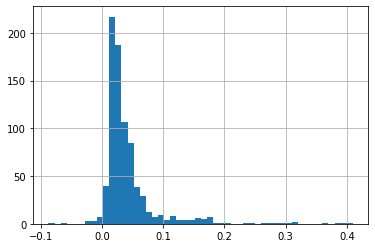

In [43]:
df.iloc[1304:]['lr'].hist(bins=50)